In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random
num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
features=torch.randn(num_examples,num_inputs,dtype=torch.float32)
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
#labels=true_w.T.dot(features)
#print(true_w[0],'``````',true_w[1])
labels+=torch.tensor(np.random.normal(0,0.01,size=labels.size()),dtype=torch.float32)
print(features[0],labels[0])

tensor([ 0.0638, -0.3907]) tensor(5.6672)


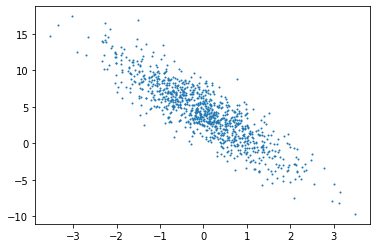

In [2]:
# import sys
# sys.path.append("/d2lzh_pytorch/")
from d2lzh_pytorch import *
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

In [3]:
from d2lzh import *
batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break

tensor([[-1.4689, -1.7003],
        [-1.7153, -0.8145],
        [-0.2653,  0.2318],
        [ 0.7022,  1.4689],
        [ 0.6671, -0.9303],
        [ 0.4929,  1.5259],
        [-0.1748,  0.2840],
        [-1.1583, -1.1988],
        [ 2.2288,  0.9838],
        [ 3.7864, -1.5044]]) tensor([7.0402e+00, 3.5209e+00, 2.8941e+00, 6.0518e-01, 8.6958e+00, 3.3796e-03,
        2.8804e+00, 5.9629e+00, 5.3112e+00, 1.6879e+01])


In [4]:
w=torch.tensor(np.random.normal(0,0.01,(num_inputs,1)),dtype=torch.float32)
b=torch.zeros(1,dtype=torch.float32)
print(w.shape,X.shape)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

torch.Size([2, 1]) torch.Size([10, 2])


tensor([0.], requires_grad=True)

In [7]:
lr =0.03
num_epochs=3
net=linreg
loss=squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l=loss(net(features,w,b),labels)
    print('epoch %d,loss %f' %(epoch+1,train_l.mean().item()))

print(true_w,'\n',w)
print(true_b,'\n',b)

epoch 1,loss 0.000056
epoch 2,loss 0.000056
epoch 3,loss 0.000056
[2, -3.4] 
 tensor([[ 2.0007],
        [-3.4007]], requires_grad=True)
4.2 
 tensor([4.1999], requires_grad=True)
